### 공모전 웹사이트 수상작 사례 크롤링

- 테스트

In [1]:
from bs4 import BeautifulSoup
import requests

maximum = 0
page = 1

URL = 'https://bigdata.seoul.go.kr/noti/selectPageListTabNoti.do?r_id=P260&bbs_seq=&ac_type=A1&sch_type=&sch_text=&currentPage=1'
response = requests.get(URL)
source = response.text
soup = BeautifulSoup(source, 'html.parser')

- 크롤링 코드

In [2]:
import requests
from lxml import html
import csv

whole_source = ""
for page_number in range(1, 11): # 페이지 번호(1~10까지)
    URL = 'https://bigdata.seoul.go.kr/noti/selectPageListTabNoti.do?r_id=P260&bbs_seq=&ac_type=A1&sch_type=&sch_text=&currentPage=' + str(page_number)
    response = requests.get(URL)
    whole_source = whole_source + response.text

tree = html.fromstring(whole_source)

# XPath를 사용하여 데이터 추출
find_title = tree.xpath('//*[@id="aform"]/div[1]/div/table/tbody/tr/td/a/text()')

# 결과를 CSV 파일에 저장 (파일 이름: bigcam_title.csv)
with open('bigcam_title.csv', 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    # 헤더 작성
    csv_writer.writerow(['Title'])
    
    # 데이터 작성
    for title in find_title:
        csv_writer.writerow([title])

print("결과가 bigcam_title.csv 파일에 저장되었습니다.")


결과가 bigcam_title.csv 파일에 저장되었습니다.


### 데이터 불러오기

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('bigcam_title.csv')

In [57]:
df

,Title
0,지하철 9호선 신설역 수요인원 예측모델 개발 및 정책 제안 [2022 빅데이터캠퍼스...
1,도시데이터 센서 환경정보 기반의 금천구 폭염 취약지역 탐색 [2022 빅데이터캠퍼스...
2,탄소중립 선도를 위한 서울시 종합에너지스테이션 우선 입지 선정 [2022 빅데이터캠...
3,서울시 차 없는 거리 효과 분석과 우선 입지 선정 [2022 빅데이터캠퍼스 공모전 ...
4,환경형평성을 고려한 서울시 내 그린 인프라 조성 [2022 빅데이터캠퍼스 공모전 -...
...,...
93,지하철 역 추가 설치 제안 - 소득수준의 관점에서 [2017 빅캠 상시공모전] \r...
94,서울시 자전거 이동경로 데이터 분석 [2017 빅캠 상시공모전] \r\n\t\t\t...
95,빅데이터 분석을 통한 서울시 숙박업소 실태와 관광활성화 방안 [2017 빅캠 상시공...
96,서울시 미세먼지 데이터를 활용한 분석 기획:유소년 보행 환경 개선에 대한 시나리오 ...


- 연도, 수상, 구분 컬럼 추가 및 가공

In [58]:
df['연도'] = df['Title'].str.extract('(\d{4})')

In [59]:
df['수상'] = df['Title'].apply(lambda x: x.rsplit('-', 1)[1] if '-' in x else None)

In [60]:
df['수상'] = df['수상'].str.extract('([가-힣]+)')
df['수상'] = df['수상'].str.replace('[^가-힣a-zA-Z0-9\[\]\s-]', '', regex=True)

In [63]:
df.loc[68:, '수상'] = None
df.loc[0:60, '구분'] = '빅데이터캠퍼스 공모전'
df.loc[60:,'구분'] = '빅캠 상시 공모전'
df['Title'] = df['Title'].str.replace(r'\[.*\]', '', regex=True)

# 'Title' 컬럼에서 한글, 띄어쓰기, 숫자만 추출
df['Title'] = df['Title'].str.strip()


In [64]:
df

,Title,연도,수상,구분
0,지하철 9호선 신설역 수요인원 예측모델 개발 및 정책 제안,2022,서울창조경제혁신센터장상,빅데이터캠퍼스 공모전
1,도시데이터 센서 환경정보 기반의 금천구 폭염 취약지역 탐색,2022,최우수상,빅데이터캠퍼스 공모전
2,탄소중립 선도를 위한 서울시 종합에너지스테이션 우선 입지 선정,2022,최우수상,빅데이터캠퍼스 공모전
3,서울시 차 없는 거리 효과 분석과 우선 입지 선정,2022,우수상,빅데이터캠퍼스 공모전
4,환경형평성을 고려한 서울시 내 그린 인프라 조성,2022,우수상,빅데이터캠퍼스 공모전
...,...,...,...,...
93,지하철 역 추가 설치 제안 소득수준의 관점에서,2017,None,빅캠 상시 공모전
94,서울시 자전거 이동경로 데이터 분석,2017,None,빅캠 상시 공모전
95,빅데이터 분석을 통한 서울시 숙박업소 실태와 관광활성화 방안,2017,None,빅캠 상시 공모전
96,서울시 미세먼지 데이터를 활용한 분석 기획유소년 보행 환경 개선에 대한 시나리오,2017,None,빅캠 상시 공모전


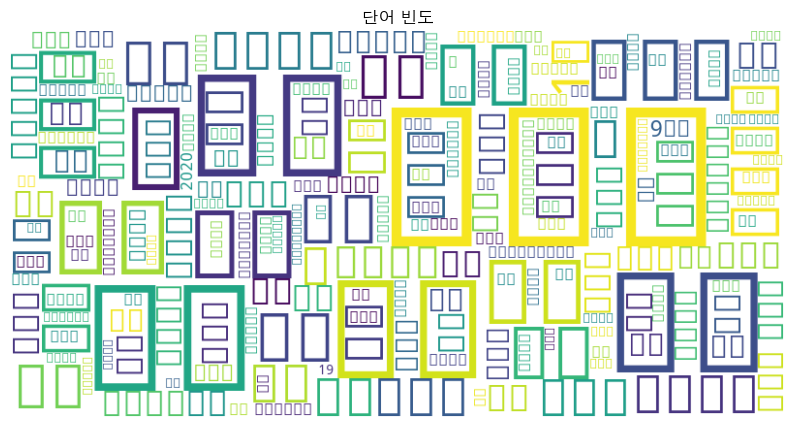

In [65]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# 한글 폰트 설정
plt.rcParams['font.family'] = "AppleGothic"
plt.rcParams['axes.unicode_minus'] = False


# 모든 문열 결합
all_titles = ' '.join(df['Title'])

# 단어 분리(공백), 개수 세기
words = all_titles.split()
word_counts = Counter(words)

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# 워드 클라우드를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('단어 빈도')
plt.show()